<a href="https://colab.research.google.com/github/AndreaMagnanini/AI-School/blob/main/AI_Know.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

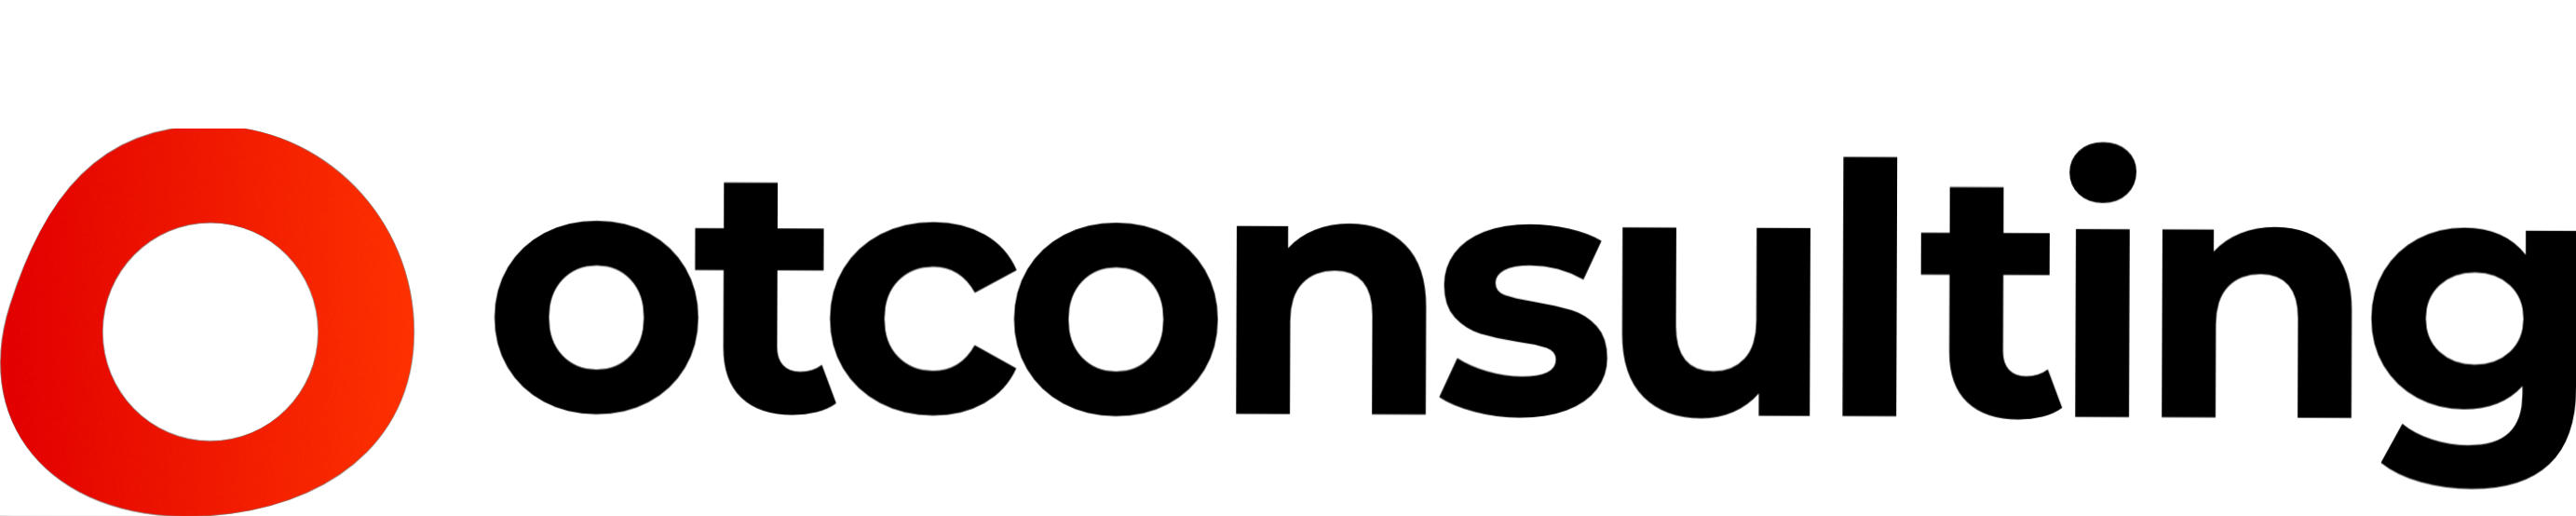

________________________________________________________________________________________________________________________________________________________________
\begin{align}
  \text{}
\end{align}
\begin{align}
  \text{Progetto di}
\end{align}
\begin{align}
  \text{}
\end{align}
\begin{align}
  \huge \text{ Scaltriti Federico}
\end{align}
\begin{align}
  \text{}
\end{align}
\begin{align}
  \huge \text{ Magnanini Andrea}
\end{align}
\begin{align}
  \text{}
\end{align}
\begin{align}
 \text{per il Corso di Perfezionamento}
\end{align}
\begin{align}
  \text{}
\end{align}
<center>
<a href="https://aischools.it/"><img src="https://aischools.it/wp-content/uploads/2021/08/ai-logo.svg" width=400 /></a>
</center>
________________________________________________________________________________________________________________________________________________________________


<div id="header" width=100%>
<table class="tfo-notebook-buttons" align="left" >
  <td>
    <a href="https://keras.io/"><img src="https://keras.io/img/logo.png" width="2050" >
      </a>
  </td>
  <td>
  <a href="https://www.tensorflow.org/"><img src="https://www.gstatic.com/devrel-devsite/prod/v24d520161c9661e427a3f6fa9973bfca56d0972dca82fa8ef65c709d915e80f3/tensorflow/images/lockup.svg"  width=2750 /></a>
  </td>
  <td>
     <a href="https://numpy.org/" ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" width=1700 /></a>
  </td> 
  <td>
    <a href="https://pandas.pydata.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" /></a>
  </td>
  <td>
    <a href="https://matplotlib.org/stable/index.html#"><img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" width=2400 />
      </a>
  </td>
</table>
</div>


In [3]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import nltk
import os
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('italian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# $\text{AI - Know}$


<div id="header" width=100%>
<table class="tfo-notebook-buttons" align="left" >
  <td>
    <a href="https://8791503.fs1.hubspotusercontent-na1.net/hubfs/8791503/AI-Know-Entity%20Extraction%20e%20Text%20Classification%20sito-1.mp4"><img src="https://www.otconsulting.com/hs-fs/hubfs/Materiale%20Base/Banner%20prodotti%20sito%20(2).png?width=450&height=141&name=Banner%20prodotti%20sito%20(2).png" width="2050" >
      </a>
  </td>
  <td>
     <h5> AI-Know è un servizio proprietario prodotto da OT-Consulting, che </h5>
     <h5> fornisce un'interfaccia unificata per la creazione, analisi, fruizione, </h5>
     <h5> supervisione e benchmarking di modelli di Machine Learning,</h5> 
     <h5>selezionabili fra quelli resi disponibili per un determinato cliente.</h5>
     <h5>E' possibile vedere una <a href="https://8791503.fs1.hubspotusercontent-na1.net/hubfs/8791503/AI-Know-Entity%20Extraction%20e%20Text%20Classification%20sito-1.mp4">demo</a> cliccando sull'immagine a lato.</h5>
     <h5>Nel seguito ci concentreremo sul modello di Text Classification.</h5>

  </td>
</table>
</div>

<div>
<img src="https://www.otconsulting.com/hubfs/diru%202-1.png" width=100% >
</div>

# $\text{Il Modello}$

Il modello di text classification è essenzialmente una rete neurale convolutiva, che riceve in input il risultato della tokenizzazione di un testo, e restituisce una classificatione fra 14 possibili classi: \\
**"Change / cancel order", "Delivery errors", "FC Other",**
**"pick-up", "Fit and measurements", "Order information",**
**"Other", "Payment problems", "Products availability",**
**"Products info", "Return instructions and timings",**
**"Return procedure authorization", "Shipment progress",**
**"Undeliverable order"**. \\
Più nello specifico, il modello è destinato alla classificazione dell'oggetto di una e-mail.

## <h3>Struttura</h5>

In [4]:
model_path = 'saved_models/cls_subtypes_500_bal_amb_it_2no_conv/'
new_model = tf.keras.models.load_model(model_path)

# Check its architecture
print(new_model.summary())
print(new_model)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 64)           512064    
                                                                 
 dropout_27 (Dropout)        (None, 100, 64)           0         
                                                                 
 global_max_pooling1d_9 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 528)               34320     
                                                                 
 dropout_29 (Dropout)        (None, 528)               0         
                                                      

# $\text{Il Dataset}$

Il dataset utilizzato per addestrare il modello è stato costruito raccogliendo 17795 thread di email, fornite dal cliente per cui il modello è destinato. Tali email provengono dall'inbox del loro *Servizio Clienti*, e sono state successivamente categorizzate in 14 classi salienti, rilevanti ai fine della loro elaborazione automatica delle richieste di assistenza. Il labelling è dunque avvenuto manualmente.

In [ ]:
df = pd.read_csv('ds_italian.csv')
df.info()

In [ ]:
df.head()

In [ ]:
df["Subtype"]

In [ ]:
df_reduced = df.groupby('Subtype').filter(lambda x: len(x) >= 500) 

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(100,20))
dataframe = df_reduced[["Description", "Subtype"]]
dataframe.head()
dataframe.groupby("Subtype").count().plot.bar(ylim=0)
plt.show()

In [ ]:
map_letter_names = {
    'B5': 'Fidelity Card',
    'C2': 'Order information',
    'C5': 'Change / cancel order',
    'C7': 'Shipment progress',
    'C12': 'Delivery errors',
    'D5': 'Payment problems',
    'G1': 'Products info',
    'G2': 'Products availability',
    'G3': 'Fit and measurements',
    'I1': 'Return procedure authorization',
    'I7': 'Return instructions and timings',
    'I10': 'Failed pick-up',
    'K3': 'Other',
    'O3': 'Undeliverable order'
}

for i, typee in enumerate(df_reduced["Subtype"]):
  df_reduced["Subtype"].iloc[i] = map_letter_names[typee]

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(100,20))
dataframe = df_reduced[["Text", "Subtype"]]
dataframe.head()
dataframe.groupby("Subtype").count().plot.bar(ylim=0)
plt.show()

##  <h3>Text Processing</h5>

In [ ]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian') + ['and', 'buongiorno', 'buonasera', 
                                              'buonpomeriggio', 'buon pomeriggio', 
                                              'buona sera', 'buon giorno', 
                                              'resi e rimborsi', 'ordini e spedizioni',
                                              'salve'])

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = str(text).lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

X = df_reduced["Text"]

X = X.apply(clean_text)
X = X.str.replace('\d+', '')

In [ ]:
y = pd.get_dummies(df_reduced['Subtype']).values
print('Shape of label tensor:', y.shape)  # asse y 2: le possibili labels
y

## <h3>Tokenizer</h5>

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 8000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

In [ ]:
X_seq = tokenizer.texts_to_sequences(X.values)
X_seq = pad_sequences(X_seq, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_seq.shape)

## <h3>Resources Saving</h3>

In [ ]:
import pickle

# saving tokenizer
with open('tokenizer_subtype_alm_bal_2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
df_reduced.to_csv("df_reduced.csv")

# $\text{Life Cycle}$

Il modello così costituito ed addestrato è stato poi integrato all'interno di un microservizio, accessibile ai clienti che usufruiscono di **AI-Know** per potervi interagire. Il ciclo di vita di un modello *On-Premise* come questo si può riassumere nel seguente schema:

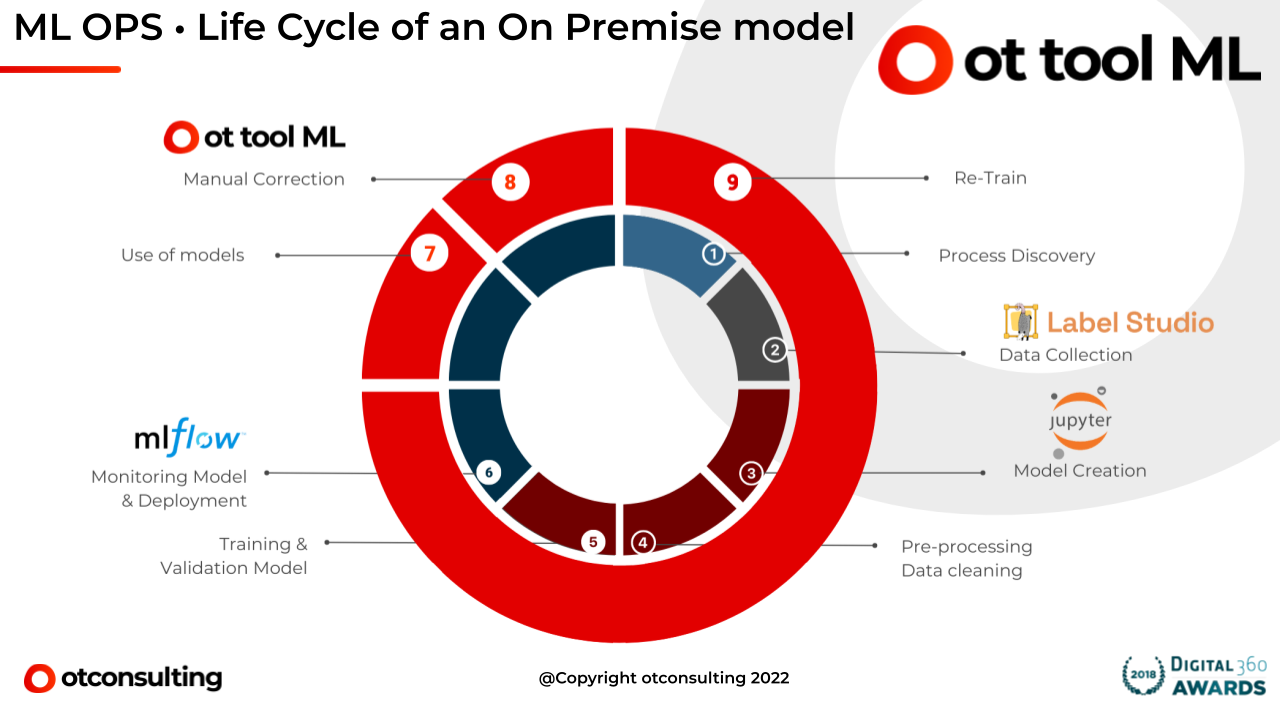